# Question 2 [L-fold Cross Validation, 20 Marks]

Implement the L-Fold Cross Validation:
- for k = 1 to 20
    - divide train data into 10 parts
    - for i = 1 to 10
             train network using 9 parts
             compute accuracy using 1 part
             end for
    - compute average error of the 10 runs
- compute average error of the 20 K

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.spatial import distance
import random


### Load Training and Testing Sets

In [3]:
trainT1A = pd.read_table('assessments_datasets/Task1A_train.csv', sep=",")
testT1A = pd.read_table('assessments_datasets/Task1A_test.csv', sep=",")

In [10]:
traindata = trainT1A.ix[:,:-1]
trainlabel = trainT1A.ix[:,-1:]
testdata = testT1A.ix[:,:-1]

/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# define knn function
def KNN(train_data, train_label, test_data, K):
    
    # get data
    trainData = train_data.ix[:,:-1]
    trainLabel = train_label.ix[:,-1:]
    testData = test_data.ix[:,:-1]
    
    dist = []
    neighbors = []
    distances = []
    dists = []
    avgList = []
    result = []
    result1 = []
    y_list = []
    y_list1 = []
    
    # calculus distance
    for i in range(len(testData)):
        dists = []
        for j in range(len(trainData)):
            #dist = []
            dist = distance.euclidean(testData.iloc[i],trainData.iloc[j])
            #dists.append((testData.iloc[i],trainData.iloc[j],trainLabel.iloc[j],dist))
            dists.append(dist)
        result.append(dists)
       

    index = np.argsort(np.array(result))

    neighbors=[]
    
    # find neighbors
    for i in range(len(index)):
        neighbors.append(index[i][:K])

    
    # find y
    for i in range(len(result)):
        for k in range(K):
            y = np.array(trainLabel)[neighbors[i][k]]
            y_list.append(y)
        y_list1.append(y_list) 
        y_list = []

    #avg labels
    for i in range(len(y_list1)):
        avg = sum(y_list1[i])/float(len(y_list1[i]))
        #print (avg)
        avgList.append(avg)
    #print (avgList)
    return avgList


In [12]:
# define mse function
def Mse(predict_label,train_label):
    error=0
    for i in range(len(predict_label)):
        error += (predict_label[i] - train_label.iloc[i].tolist())**2
        MSE = np.sqrt(error/len(predict_label))
    return MSE

### Q2-1 Implement a L-Fold Cross Validation (CV) function for KNN regressor :
            cv(train.data, train.label, numFold=10)

In [13]:
def crossvalidation(train_data,train_label,numFold):

    array_index = np.arange(num)
    random.shuffle(array_index)
    
    Error= []
    SD = []
    split_index = []
    split_index =[array_index[i::numFold] for i in range(numFold)]
    #print (split_index)

    for k in range(1,21):
        #print ("k",k)
        rmse_val = 0
        Error_list= []
        error= []
        sd = []

        # find train and test
        for value in range(numFold):
            
            test_index = split_index[value]
            np.array(test_index) #np.array(m) 

            #get test dataframe
            test_df = pd.DataFrame(trainT1A.iloc[test_index])

            #get train index
            train_index = [value for value in split_index if value not in test_index]
            
            all_idx = []
            for i in range(len(train_index)):
                train_idx = train_index[i].tolist()
                for j in range(len(train_idx)):
                    idx = train_idx[j]
                    all_idx.append(idx)
            train_df = trainT1A.ix[all_idx]
            
            # MSE . train - test
            y_actual = test_df.ix[:,-1:]

            # calculue KNN
            y_predicted = KNN(train_df,train_df,test_df, k)
            
            sd.append(Mse(y_predicted, y_actual))
            rmse_val += (Mse(y_predicted, y_actual))
            error = rmse_val/(value+1)
            
        Error.append(error)
        SD.append(sd)
        
    return Error,SD


### Q2-2 Run  L-Fold CV function where the numFold is set to 10. 

In [14]:
# set nunFlod = 10
error = crossvalidation(traindata,trainlabel,10)

/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:60: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/chengxinrui/anaconda/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [15]:
# get mean squre error and standard deviation from crossvalidation result
MSE = error[0]
SD = error[1]
#print (MSE)
#print(SD)

In [16]:
# calculate upper and lower line around the average error
upper = []
lower = []

for i in range(len(SD)):
    sd = np.std(SD[i])
    upper.append(MSE[i] + sd)
    lower.append(MSE[i] - sd)
    
print ('upper',upper)
print ('lower',lower)

upper [array([1.09082809]), array([0.63217492]), array([0.71992413]), array([0.68445089]), array([0.94693837]), array([1.12519653]), array([1.36235687]), array([1.60954496]), array([1.80896993]), array([1.98355127]), array([2.17049017]), array([2.33059932]), array([2.46393249]), array([2.64006903]), array([2.76364992]), array([2.91290465]), array([3.05437201]), array([3.19755521]), array([3.34478227]), array([3.49555111])]
lower [array([0.40599146]), array([0.34397147]), array([0.2527074]), array([0.1681866]), array([0.19490256]), array([0.08754486]), array([0.17369128]), array([0.20720526]), array([0.21681634]), array([0.21205818]), array([0.26505636]), array([0.30410878]), array([0.29138511]), array([0.39162802]), array([0.30515281]), array([0.33397327]), array([0.36331979]), array([0.4205276]), array([0.45996805]), array([0.48174227])]


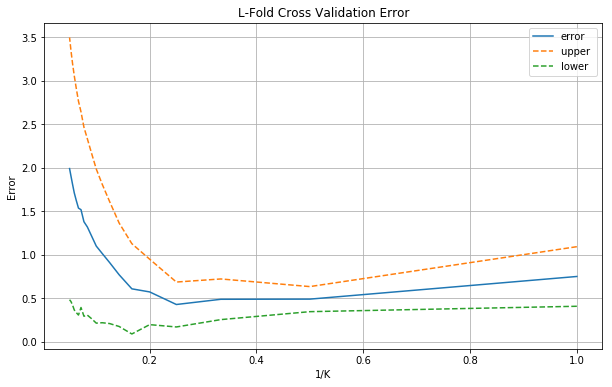

In [20]:
#draw plot

x = []
for i in range(1,21):
    x.append(1/i)
    
y1 = MSE
x1 = x

y2 = upper
x2 = x

y3 = lower
x3 = x 

plt.figure(figsize=(10, 6))
plt.plot(x1,y1,'',label="error")
plt.plot(x2,y2,'--',label="upper ")
plt.plot(x3,y3,'--',label="lower ")


plt.title('L-Fold Cross Validation Error')
plt.legend(loc='upper right')
plt.xlabel('1/K')
plt.ylabel('Error')
plt.grid(x)
plt.show()

### Q2-3 Report the values of K that result to minimum average error and minimum standard deviation of errors based on your cross validation plot in the previous part (Part II).

- The values of K that result to minimum average error : k = 4 (1/k = 0.25)
- The values of K that result to minimum standard deviation of errors : k = 7 (1/k =0.15)